***Import libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

***Read Dataset***

In [ ]:
df = pd.read_csv('airports.csv')

***Check The Dataset***

In [ ]:
df.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'gps_code', 'iata_code',
       'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

In [ ]:
df.shape


(54364, 18)

In [ ]:
df.head()


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [ ]:
df['type'].value_counts()


type
small_airport     33907
heliport          11084
medium_airport     4573
closed             3156
seaplane_base      1023
large_airport       598
balloonport          23
Name: count, dtype: int64

In [ ]:
df['continent'].unique()


array([nan, 'OC', 'AF', 'AN', 'EU', 'AS', 'SA'], dtype=object)

***Delete usless ata and filling empty data ***

In [ ]:
df.drop(['home_link','wikipedia_link','keywords'], axis=1, inplace=True)

In [ ]:
df['iso_country'][pd.isnull(df['continent'])].unique()

array(['US', 'PR', 'MX', 'GL', 'GB', 'BM', 'BS', 'BZ', 'CA', 'CR', 'CU',
       'PA', 'DO', 'GT', 'HN', 'HT', 'JM', 'PM', 'TC', 'GD', 'NI', 'SV',
       'MF', 'KY', 'VI', 'AG', 'BB', 'DM', 'GP', 'MQ', 'BL', 'KN', 'LC',
       'AW', 'BQ', 'CW', 'SX', 'AI', 'MS', 'TT', 'VG', 'VC'], dtype=object)

In [ ]:
df.loc[pd.isnull(df['continent']),'continent'] = 'NA'

In [ ]:
df['continent'].unique()


array(['NA', 'OC', 'AF', 'AN', 'EU', 'AS', 'SA'], dtype=object)

***Save clean data***

In [ ]:
df.to_csv('clean_airport.csv',index=False)

***Diagram***

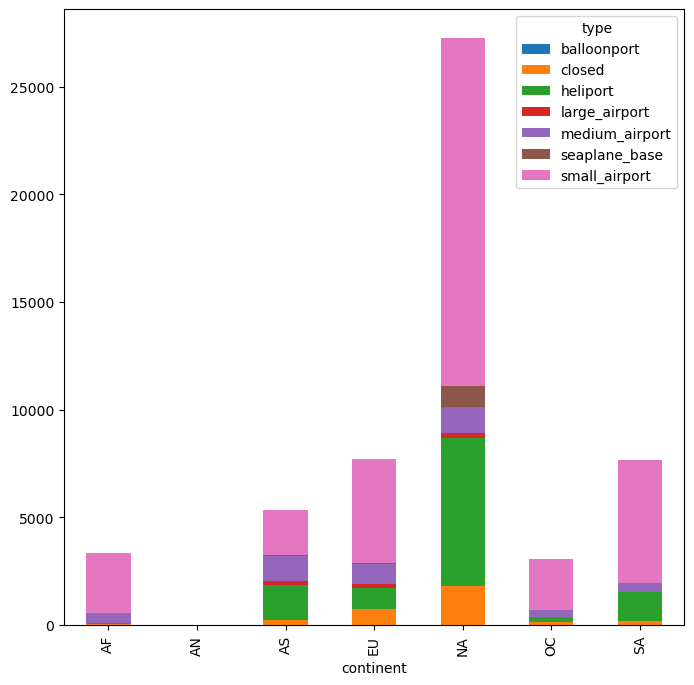

In [ ]:
df.groupby(['continent','type']).size().unstack().plot(kind ='bar', stacked=True,figsize= (8,8))
plt.show()

In [ ]:
fig = px.scatter_geo(df,
         lat='latitude_deg',
         lon='longitude_deg',
         hover_name='name',
         projection="orthographic")


fig.update_geos(showcoastlines=True, coastlinecolor="Black")


fig.update_layout(title='3D Globe with Geographic Points',
                  geo=dict(showland=True, landcolor="LightGreen"))
fig.show()